In [14]:
import adios2
import numpy as np
import io
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from mpi4py import MPI


In [19]:
bp_file = "build/gpu_parallel_rk4.bp"

with adios2.Stream(bp_file, "r") as fh:
    for step in fh:
        vars = step.available_variables()
        group_names = sorted(set(var.split("/")[0] for var in vars.keys()))
        print("📦 Found groups:", group_names)


📦 Found groups: ['y0_q100']
📦 Found groups: ['y10_q100']
📦 Found groups: ['y20_q100']
📦 Found groups: ['y30_q100']
📦 Found groups: ['y40_q100']
📦 Found groups: ['y50_q100']
📦 Found groups: ['y60_q100']
📦 Found groups: ['y70_q100']
📦 Found groups: ['y80_q100']
📦 Found groups: ['y90_q100']


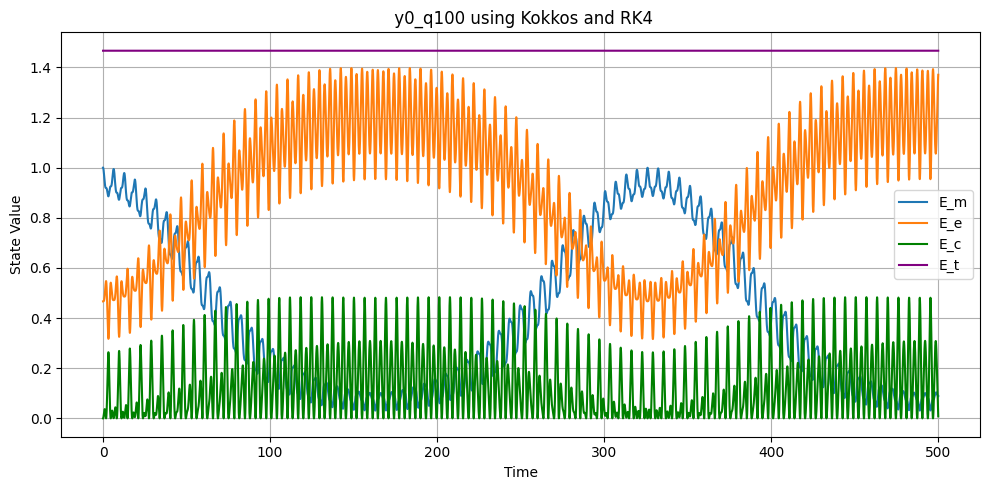

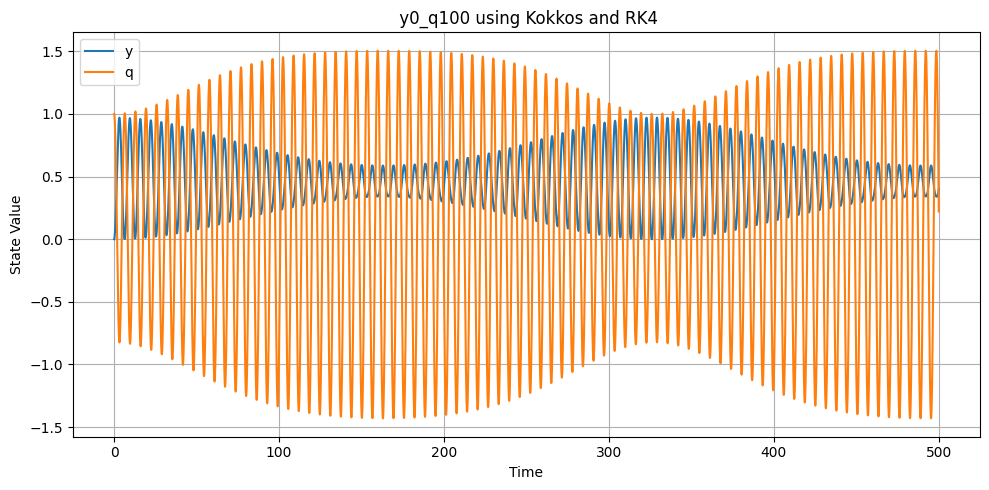

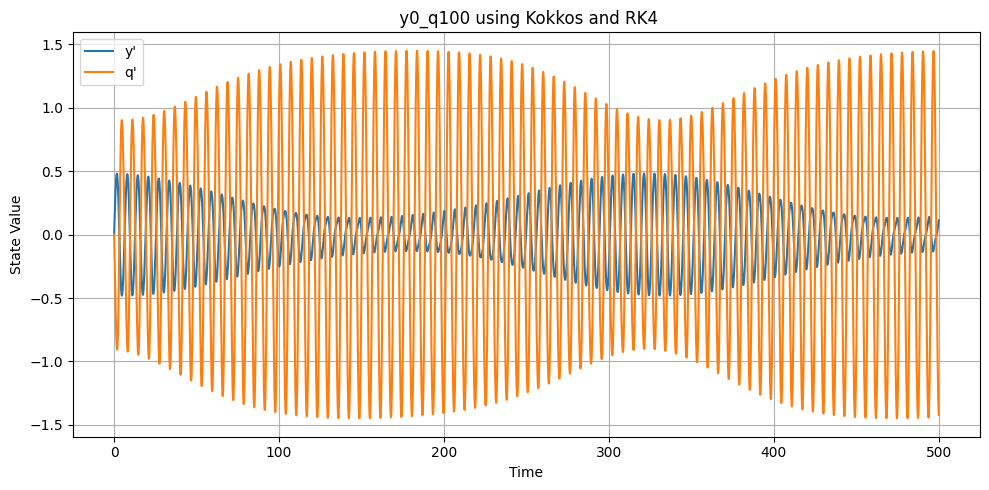

In [22]:
# Constants
C1 = 0.2
C2 = 0.7
C3 = 1 - C2
C4 = C1 * C2 / C3

with adios2.Stream(bp_file, "r") as fh:
    for step in fh:
        vars = step.available_variables()
        group_names = sorted(set(var.split("/")[0] for var in vars.keys()))
    
        for group in group_names:
            try:
                time = np.array(step.read(f"{group}/time"))
                y    = np.array(step.read(f"{group}/y"))
                q    = np.array(step.read(f"{group}/q"))
                dy    = np.array(step.read(f"{group}/dy"))
                dq    = np.array(step.read(f"{group}/dq"))

                E1 = (1-2.*y)**2 + (2.*dy)**2
                E2 = C4*(1/C2*dq**2 + q**2)
                Ec = C1*q**2.*(2.*y)
                E_t = E1 + E2 + Ec

                plt.figure(figsize=(10, 5))
                plt.plot(time[1:500000], E1[1:500000], label="E_m", linewidth=1.5)
                plt.plot(time[1:500000], E2[1:500000], label="E_e", linewidth=1.5)
                plt.plot(time[1:500000], Ec[1:500000], label="E_c", linewidth=1.5, color ='green')
                plt.plot(time[1:500000], E_t[1:500000], label="E_t", linewidth=1.5, color ='purple')
                plt.title(f" {group} using Kokkos and RK4")
                plt.xlabel("Time")
                plt.ylabel("State Value")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()
                plt.show()

                plt.figure(figsize=(10, 5))
                plt.plot(time[1:500000], y[1:500000], label="y", linewidth=1.5)
                plt.plot(time[1:500000], q[1:500000], label="q", linewidth=1.5)
                plt.title(f" {group} using Kokkos and RK4")
                plt.xlabel("Time")
                plt.ylabel("State Value")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()
                plt.show()


                plt.figure(figsize=(10, 5))
                plt.plot(time[1:500000], dy[1:500000], label="y'", linewidth=1.5)
                plt.plot(time[1:500000], dq[1:500000], label="q'", linewidth=1.5)
                plt.title(f" {group} using Kokkos and RK4")
                plt.xlabel("Time")
                plt.ylabel("State Value")
                plt.grid(True)
                plt.legend()
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"[ERROR] Could not read group '{group}': {e}")
        break
       